## Seaborn에서 annotate 사용하기
* seaborn 에서 annotate로 원하는 텍스트를 찍고자 하면 matplotlib을 함께 사용해야 합니다.

In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# seaborn에 내장되어 있는 데이터셋을 불러옵니다.
mpg = sns.load_dataset('mpg')
# 불러온 데이터셋을 확인합니다.
mpg.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
299,27.2,4,141.0,71.0,3190,24.8,79,europe,peugeot 504


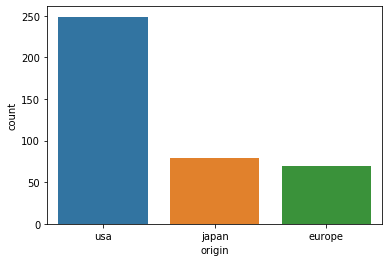

In [3]:
# countplot으로 origin에 해당되는 데이터의 수를 세어서 그래프로 시각화 합니다.
# 여기에 각 데이터의 값을 그래프에 표현할 예정입니다.
sns.countplot(data=mpg, x="origin")

In [4]:
# origin 별로 갯수를 집계한 결과를 재사용하기 위해 변수에 담습니다.
mpg_origin = mpg["origin"].value_counts()
mpg_origin

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [5]:
# mpg_origin_count에 담겨진 series 에서 원하는 데이터를 가져옵니다.
mpg_origin["usa"]

249

In [6]:
# 인덱스 번호로 가져올 수도 있습니다.
# 반복된 작업을 피하기 위해 여기에서는 인덱스 번호를 사용할 예정입니다.
mpg_origin[0]

249

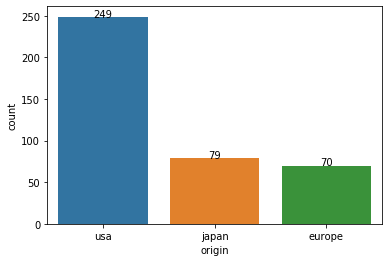

In [7]:
g = sns.countplot(data=mpg, x="origin")
for i in range(mpg_origin.shape[0]):
    g.text(x=i, y=mpg_origin[i], s=mpg_origin[i], 
           horizontalalignment='center')

## regplot으로 그려보기

Text(200, 20, '200')

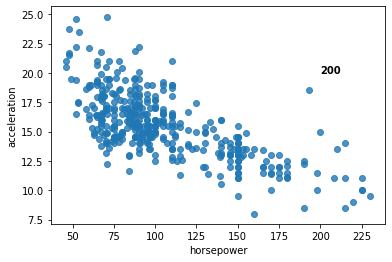

In [8]:
g = sns.regplot(data=mpg, x="horsepower", y="acceleration", fit_reg=False)

g.text(x=200, y=20, s="200", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [9]:
mpg_xy = mpg[["horsepower", "acceleration"]].copy()
mpg_xy.columns = ["x", "y"]
mpg_xy.sample()

,x,y
201,110.0,16.2


In [10]:
mpg_row_count = mpg_xy.shape[0]
mpg_row_count

398

posx and posy should be finite values
posx and posy should be finite values


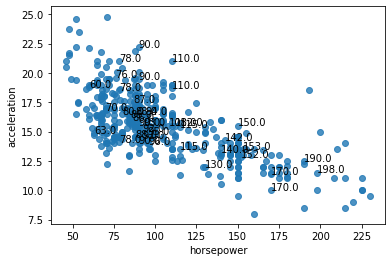

In [11]:
g = sns.regplot(data=mpg, x="horsepower", y="acceleration", fit_reg=False)
for mpg_row_no in range(mpg_row_count):
    # 매번 다 찍으면 너무 많기 때문에 10개에 하나씩만 찍도록
    if mpg_row_no % 10 == 0:
        g.text(x=mpg_xy.loc[mpg_row_no, "x"], 
               y=mpg_xy.loc[mpg_row_no, "y"], 
               s=mpg_xy.loc[mpg_row_no, "x"], 
               size='medium')